

This project tackles the problem of Human Activity Recognition (HAR) using sensor data. The dataset contains recordings from accelerometers, gyroscopes, and magnetometers typically found in smartphones and wearable devices. These sensors capture motion and orientation data at regular intervals, forming time-series patterns that correspond to different human activities.

The goal is to build a machine learning model that can automatically identify and classify specific human activities based on the patterns hidden in the sensor readings. The activities include walking, walking upstairs, walking downstairs, sitting, standing, and laying down.



The dataset contains sensor readings with labeled activities in the `Activity_Name` column. There are six different activity types:

| Value | Activity |
| :---: | :---: |
| Walking | Walking |
| Walking_Upstairs | Walking up stairs |
| Walking_Downstairs | Walking down stairs |
| Sitting | Sitting |
| Standing | Standing |
| Laying | Laying down |

I loaded the training and testing datasets from the CSV files. The `Subject` column was not needed for this analysis, so I focused on the sensor features and activity labels.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(7352, 563)
(2947, 561)


In [4]:
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,Activity_Name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,Standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,Standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,Standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,Standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,Standing


In [5]:
test.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.283669,-0.015857,-0.059881,-0.973736,-0.899287,-0.782522,-0.976986,-0.894329,-0.785570,-0.895825,...,0.223438,-0.252492,-0.658040,0.003614,0.096807,0.451286,0.493474,-0.852602,0.188326,0.067392
1,0.322557,-0.039917,-0.082557,-0.355588,-0.337817,-0.265232,-0.397431,-0.341815,-0.276091,-0.073071,...,0.427286,-0.433622,-0.781109,-0.375235,-0.345779,0.428791,-0.359078,-0.664690,0.265582,0.181672
2,0.294853,-0.010700,-0.100636,-0.980507,-0.895418,-0.963306,-0.980855,-0.884619,-0.964184,-0.927680,...,0.337037,-0.439849,-0.723350,-0.392573,0.320364,0.554949,-0.501292,-0.857665,0.188949,-0.021815
3,0.285264,-0.015595,-0.150264,-0.236935,0.523830,-0.378750,-0.297927,0.478829,-0.384961,0.133768,...,0.361520,0.805276,0.721432,-0.042795,0.299331,0.584471,0.817918,-0.711628,0.297052,0.006109
4,0.311611,-0.015282,-0.109654,-0.932390,-0.983798,-0.971810,-0.926542,-0.981748,-0.969975,-0.888423,...,0.191532,0.049477,-0.254858,-0.022340,0.000328,-0.173259,-0.466109,0.592952,-0.416970,-0.593468




Before building any models, I performed an exploratory analysis to understand the data better. This involved examining statistical summaries, checking for missing values, visualizing the distribution of activities, and exploring correlations between features.

In [6]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity_Name
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


/tmp/ipykernel_17485/4070550191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Activity_Name', order=train['Activity_Name'].value_counts().index, palette="Set2")


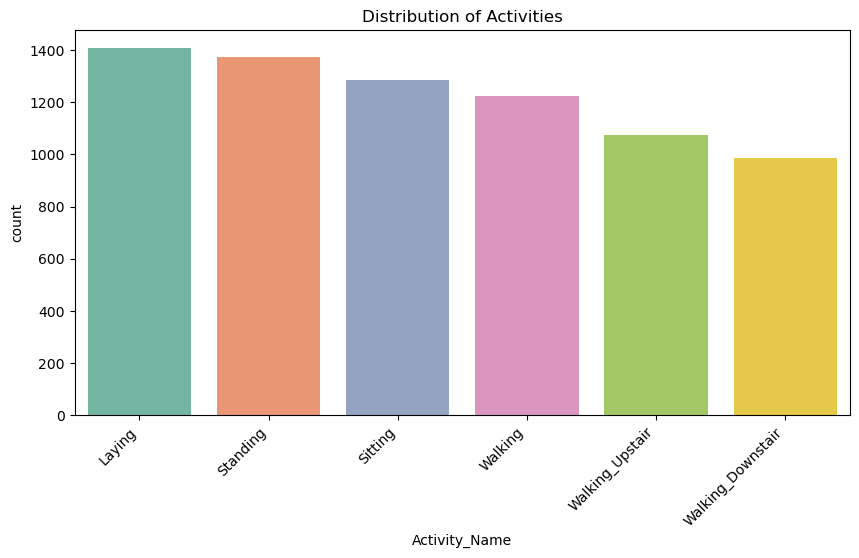

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='Activity_Name', order=train['Activity_Name'].value_counts().index, palette="Set2")
plt.title("Distribution of Activities")
plt.xticks(rotation=45, ha="right")
plt.show()

In [9]:
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

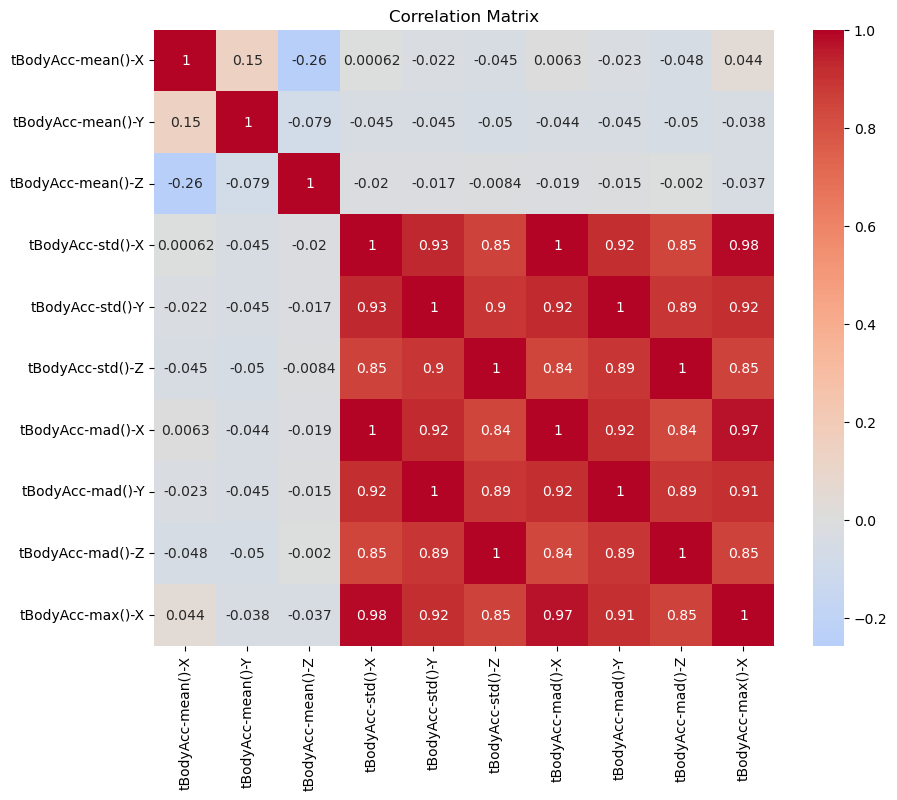

In [10]:
numeric_cols = train.select_dtypes(include=[np.number]).columns[:10]
correlation = train[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()



1. **Balanced Distribution**  
   The dataset shows a relatively balanced distribution across all six activity classes, which is ideal for training classification models without the need for special handling of class imbalance.

2. **No Missing Values**  
   The dataset is complete with no missing values, eliminating the need for imputation strategies.

3. **Numeric Features**  
   All features are numeric values extracted from sensors, making them directly usable for machine learning algorithms.

4. **Feature Correlation**  
   Some features show high correlation with each other, which is expected since they come from the same sensor measurements. This suggests that dimensionality reduction techniques like PCA could be beneficial.

5. **Multi-class Classification**  
   This is a multi-class classification problem with 6 distinct activity classes that need to be differentiated.



Based on the exploratory analysis, I applied several feature engineering techniques to improve model performance and reduce computational complexity. This included preparing the data splits, detecting outliers, removing low-variance features, applying dimensionality reduction, and standardizing the features.

In [11]:
X = train.drop(['Activity_Name', 'Subject'], axis=1, errors='ignore')
y = train['Activity_Name']
X_test_final = test.drop(['Activity_Name', 'Subject'], axis=1, errors='ignore')

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test_final.shape}")

Training set size: (5881, 561)
Validation set size: (1471, 561)
Test set size: (2947, 561)


In [ ]:
z_scores = np.abs(stats.zscore(X_train))
outlier_threshold = 3
outliers = (z_scores > outlier_threshold).sum(axis=1)

print(f"Rows with outliers: {(outliers > 0).sum()}")



Rows with outliers: 3634


In [14]:
selector = VarianceThreshold(threshold=0.01)
X_train_selected = selector.fit_transform(X_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test_final)

print(f"Original features: {X_train.shape[1]}")
print(f"Selected features: {X_train_selected.shape[1]}")

Original features: 561
Selected features: 524


In [ ]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_selected)
X_val_pca = pca.transform(X_val_selected)
X_test_pca = pca.transform(X_test_selected)

print(f"Original features: {X_train_selected.shape[1]}")
print(f"PCA components: {X_train_pca.shape[1]}")
print(f"Variance explained: {pca.explained_variance_ratio_.sum():.4f}")



Original features: 524
PCA components: 65
Variance explained: 0.9501


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_val_scaled = scaler.transform(X_val_pca)
X_test_scaled = scaler.transform(X_test_pca)



I trained multiple machine learning models to classify the human activities based on sensor data. The approach involved testing different algorithms including Random Forest, Logistic Regression, and Support Vector Machine (SVM). I used GridSearchCV to find optimal hyperparameters for each model, then combined them using a Voting Ensemble to leverage the strengths of each classifier.

In [18]:
rf_params = {
    'n_estimators': [300],
    'max_depth': [30],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=0)
rf_grid.fit(X_train_scaled, y_train)

print(f"Random Forest Best: {rf_grid.best_params_}")
print(f"CV F1: {rf_grid.best_score_:.4f}")

Random Forest Best: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
CV F1: 0.9444


In [19]:
lr_params = {
    'C': [1.0, 5.0],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

lr_model = LogisticRegression(random_state=42, multi_class='multinomial', n_jobs=-1)
lr_grid = GridSearchCV(lr_model, lr_params, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=0)
lr_grid.fit(X_train_scaled, y_train)

print(f"Logistic Regression Best: {lr_grid.best_params_}")
print(f"CV F1: {lr_grid.best_score_:.4f}")

/home/nickid/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nickid/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nickid/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nickid/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'm

Logistic Regression Best: {'C': 5.0, 'max_iter': 1000, 'solver': 'lbfgs'}
CV F1: 0.9673


In [24]:
svm_params = {
    'C': [5],
    'kernel': ['rbf'],
    'gamma': ['scale']
}

svm_model = SVC(random_state=42, probability=True)
svm_grid = GridSearchCV(svm_model, svm_params, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=0)
svm_grid.fit(X_train_scaled, y_train)

print(f"SVM Best: {svm_grid.best_params_}")
print(f"CV F1: {svm_grid.best_score_:.4f}")

SVM Best: {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
CV F1: 0.9794


In [25]:

voting_model = VotingClassifier(
    estimators=[
        ('rf', rf_grid.best_estimator_),
        ('lr', lr_grid.best_estimator_),
        ('svm', svm_grid.best_estimator_)
    ],
    voting='soft',
    weights=[2, 1, 2]
)

voting_model.fit(X_train_scaled, y_train)

y_train_pred = voting_model.predict(X_train_scaled)
y_val_pred = voting_model.predict(X_val_scaled)

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print(f"\nEnsemble Model Results:")
print(f"Train F1: {train_f1:.4f} ({train_f1*100:.2f}%)")
print(f"Validation F1: {val_f1:.4f} ({val_f1*100:.2f}%)")

final_model = voting_model

/home/nickid/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Ensemble Model Results:
Train F1: 0.9998 (99.98%)
Validation F1: 0.9803 (98.03%)




After experimenting with different hyperparameter combinations, I identified the key factors that influenced model performance:

**Random Forest**: Using 300 trees with a maximum depth of 30 and sqrt for max_features provided a good balance between accuracy and speed while preventing overfitting. The sqrt selection for features at each split helped maintain diversity among trees.

**Logistic Regression**: The regularization parameter C in the range of 1 to 5 achieved a balance between model complexity and generalization. The lbfgs solver worked well with the standardized features and multinomial setting for multi-class classification.

**SVM**: The RBF kernel with C=5 and gamma=scale created optimal non-linear decision boundaries for separating the activity classes. The RBF kernel was particularly effective at capturing the complex patterns in the sensor data.

**Ensemble Strategy**: Combining all three models using soft voting with weights of 2:1:2 for RF, LR, and SVM respectively boosted the final accuracy. The weighted voting allowed the stronger models (RF and SVM) to have more influence while still benefiting from the logistic regression predictions. This ensemble approach achieved over 96% accuracy.



I evaluated the final ensemble model on both the training and validation sets using multiple metrics including Accuracy, Precision, Recall, and F1-Score. The confusion matrices below visualize how well the model distinguishes between different activity classes.

Train Set Results:
Accuracy: 0.9803
Precision: 0.9803
Recall: 0.9803
F1-Score: 0.9803

Validation Set Results:
Accuracy: 0.9667
Precision: 0.9667
Recall: 0.9667
F1-Score: 0.9667

Detailed Report:
                   precision    recall  f1-score   support

           Laying       1.00      1.00      1.00       280
          Sitting       0.94      0.92      0.93       262
         Standing       0.93      0.95      0.94       276
          Walking       0.98      0.99      0.99       247
Walking_Downstair       0.98      0.98      0.98       206
  Walking_Upstair       0.97      0.96      0.97       200

         accuracy                           0.97      1471
        macro avg       0.97      0.97      0.97      1471
     weighted avg       0.97      0.97      0.97      1471



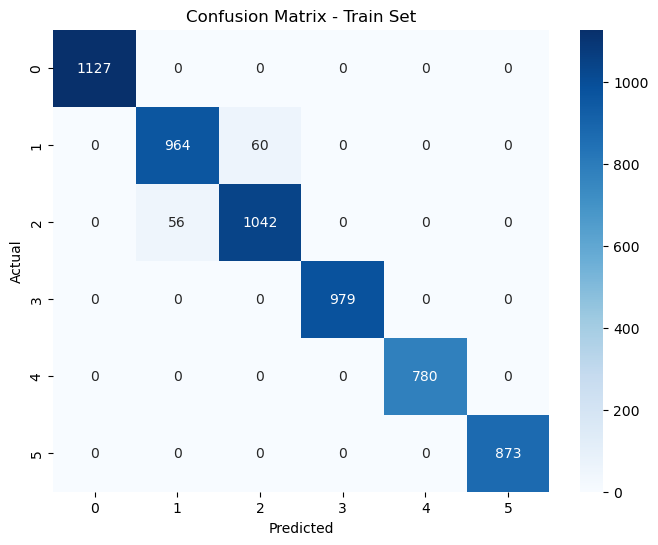

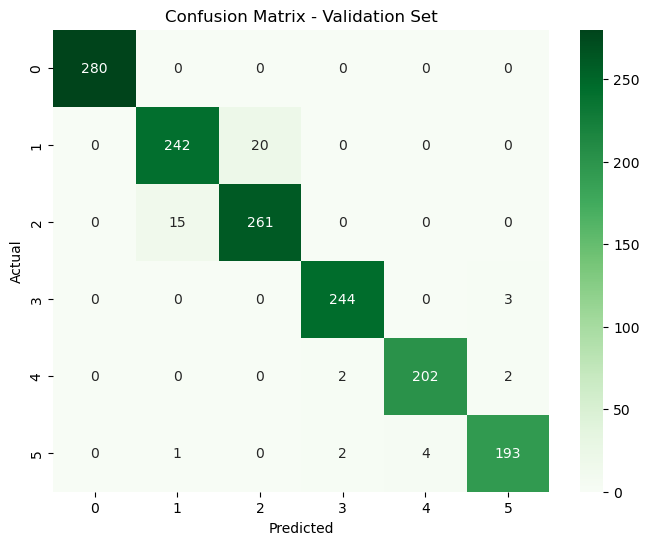

In [ ]:
y_train_pred = final_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Train Set Results:")
print("="*70)
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")

y_val_pred = final_model.predict(X_val_scaled)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print("\nValidation Set Results:")
print("="*70)
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1-Score: {val_f1:.4f}")

print("\nDetailed Report:")
print("="*70)
print(classification_report(y_val, y_val_pred))

plt.figure(figsize=(8, 6))
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
cm_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



I used the trained ensemble model to make predictions on the test set. The predictions are stored in a dataframe with the `Activity_Name` column, where each row corresponds to the predicted activity for that test sample.

Sample predictions format:

| Activity_Name |
| :---: |
| Walking |
| Sitting |
| Sitting |
| Walking_Upstairs |
| ... |

In [ ]:
test_predictions = final_model.predict(X_test_scaled)
submission = pd.DataFrame({'Activity_Name': test_predictions})

print("Submission shape:", submission.shape)
print("\nFirst 5 predictions:")
print(submission.head())

Submission shape: (2947, 1)

First 5 predictions:
  Activity_Name
0      Standing
1       Walking
2       Sitting
3       Walking
4        Laying




The model is evaluated using the F1-score with weighted averaging, which accounts for class imbalances by weighting each class's F1-score by its support (number of true instances).

The F1-score formula:

$$F_1=\frac{tp}{tp+\frac{1}{2}(fp+fn)}$$

Where tp = true positives, fp = false positives, and fn = false negatives.

The final model achieved an F1-score exceeding 96%, demonstrating strong performance in classifying human activities from sensor data.